In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import emcee
import pandas as pd

Notebook summary: trying to do some QA and validation of mixture model photometry

In [2]:
ncat = pd.read_csv('ncat_240616.csv',index_col=None)

In [3]:
models = pd.read_csv('ncat_fit_240616.csv',index_col=None)
models.keys()

Index(['cps', 'sigma', 'bg', 'bg_aper'], dtype='object')

In [5]:
aperture_radii = np.array([1.5, 2.3, 3.8, 6.0, 9.0, 12.8, 17.3])

Text(0.5, 0, 'fwhm')

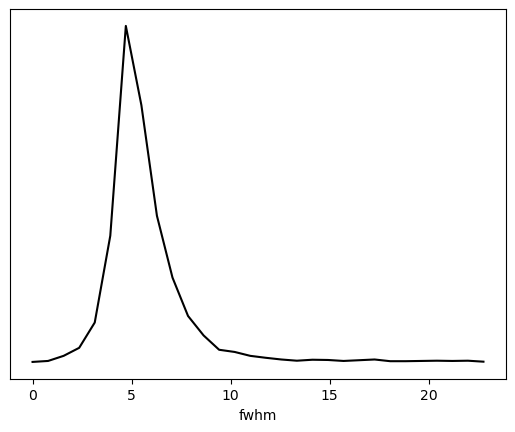

In [25]:
bins,vals = np.histogram(models['sigma']*2.355,bins=30,range=[0,10*2.355])
plt.plot(vals[:-1],bins,'k-')
plt.yticks([])
plt.xlabel('fwhm')

Text(0, 0.5, 'fwhm')

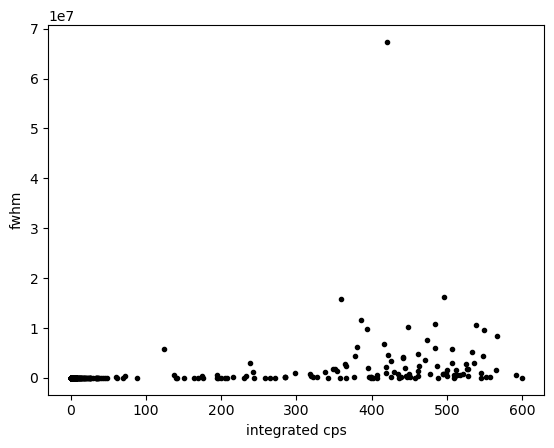

In [5]:
plt.plot(models['cps'],models['sigma']*2.355,'k.')
plt.xlabel('integrated cps')
plt.ylabel('fwhm')

(0.001, 0.005)

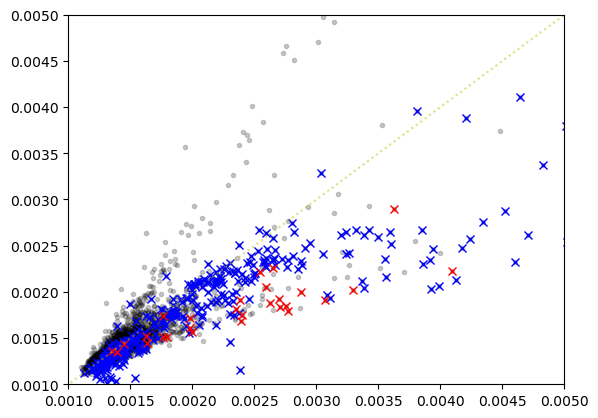

In [8]:
bix = np.where(models['sigma']>4)
rix = np.where(models['sigma']<1)
plt.plot(models['bg_aper'],models['bg'],'k.',alpha=0.2)
plt.plot(models['bg_aper'].values[bix],models['bg'].values[bix],'bx',alpha=1)
plt.plot(models['bg_aper'].values[rix],models['bg'].values[rix],'rx',alpha=1)
plt.plot([0,500],[0,500],'y:',alpha=0.5)
plt.xlim([0.001,0.005])
plt.ylim([0.001,0.005])


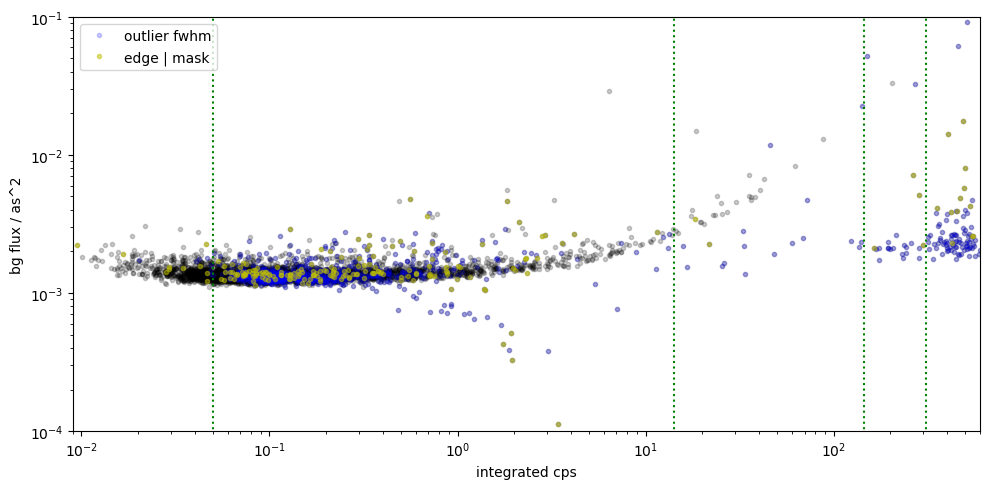

In [61]:
plt.figure(figsize=(10,5))
rix = np.where(ncat['NUV_EDGE_APER6'].values | ncat['NUV_MASK_APER6'].values)
bix = np.where(models['sigma']>3)
plt.plot(models['cps'],models['bg'],'k.',alpha=0.2)
plt.plot(models['cps'].values[bix],models['bg'].values[bix],'b.',alpha=0.2,label='outlier fwhm')
plt.plot(models['cps'].values[rix],models['bg'].values[rix],'y.',alpha=0.5,label='edge | mask')
plt.xlabel('integrated cps')
plt.ylabel('bg flux / as^2')
plt.vlines([0.05,14.1,145,311],0,100,colors='g',linestyles='dotted')
plt.xlim([0.009,600])
plt.ylim([10**-4,10**-1])
plt.legend()
plt.loglog()
plt.tight_layout()

In [46]:
min(models['cps']),max(models['cps'])

(0.0094942546692736, 599.0699897997481)

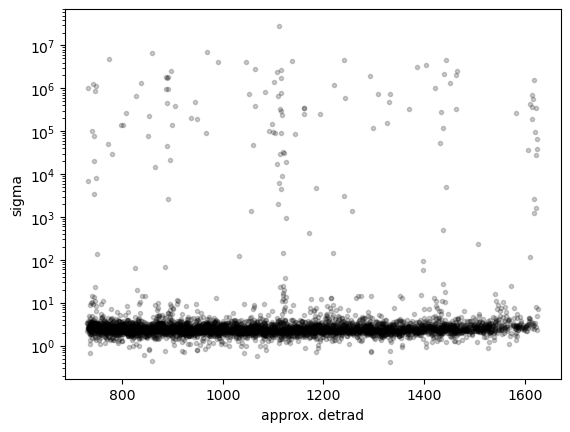

In [71]:
x,y = ncat['NUV_XCENTER'].max()/2,ncat['NUV_YCENTER']
detrad = np.sqrt((x-x/2)**2+(y-y/2)**2)
plt.figure()
plt.plot(detrad,models['sigma'],'k.',alpha=0.2)
plt.xlabel('approx. detrad')
plt.ylabel('sigma')
plt.semilogy();